<a href="https://colab.research.google.com/github/priya1804/THE-PIMA-INDIAN-DIABETES-DATABASE/blob/main/DIABETES_FIRST_STEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Data Preprocessing
#Checking the shape of the dataset
df.shape


(768, 9)

In [5]:
#Unique values in the dataset

variables = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
for i in variables:
    print(df[i].unique())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
[  0  94 168  88 543 846 175 230  83  96 235 

In the dataset, the variables except Pregnancies and Outcome cannot have a value of 0 because it is impossible to have 0 Glucose Levels or 0 Blood Pressure. So, this will be counted as incorrect information.

Checking the count of value 0 in the variables

In [6]:
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',]
for i in variables:
    c = 0
    for x in (df[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


Now that we have a count of incorrect values in the variables, let's replace these values.

In [7]:
#replacing the missing values with the mean
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in variables:
    df[i].replace(0,df[i].mean(),inplace=True)

<ipython-input-7-b2c80a177e88>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace(0,df[i].mean(),inplace=True)


In [8]:
#checking to make sure that incorrect values are replace
for i in variables:
    c = 0
    for x in (df[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


In [9]:
#Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [10]:
#Descriptive Statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In the exploratory data analysis, I'll explore how the data is distributed, check how the features are related to each other, and see how the features connect to the target variable. I'll start by examining the overall data distribution and then look at how the independent variables relate to the target variable.

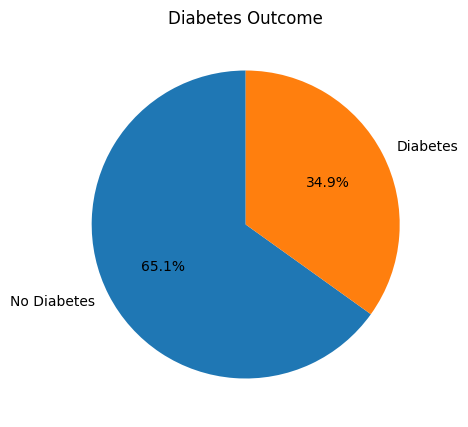

In [12]:
#Diabetes Count
plt.figure(figsize=(5,5))
plt.pie(df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Diabetes Outcome')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


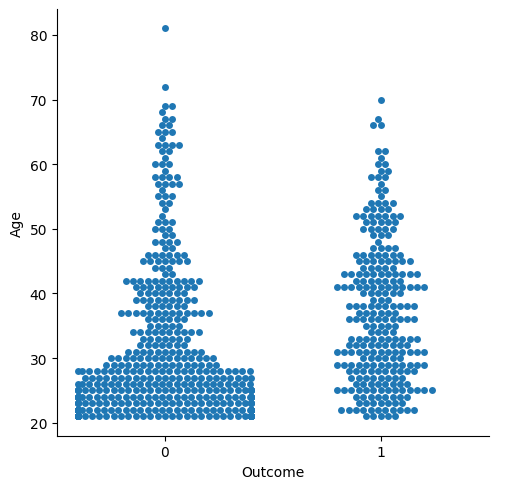

In [13]:
#Age Distribution and Diabetes
sns.catplot(x="Outcome", y="Age", kind="swarm", data=df)

From the graph, it is can be seen that most patients are adults aged 20–30 years. Patients in the age range 40–55 years are more prone to diabetes, as compared to other age groups.

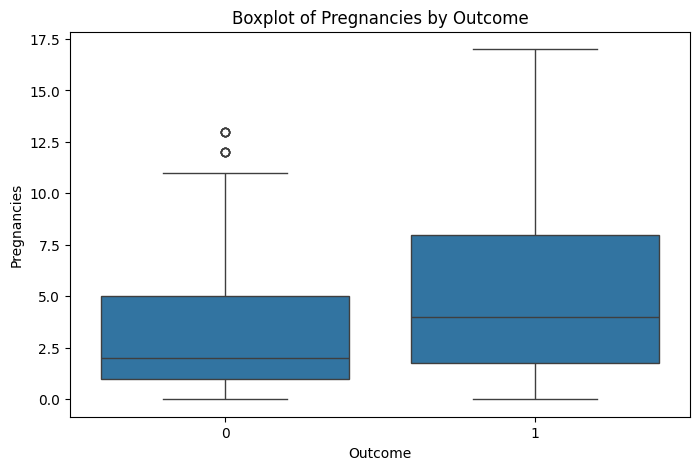

In [19]:
#Pregnancies and Diabetes
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title('Boxplot of Pregnancies by Outcome')
plt.show()


According to the graph, the increased number of pregnancies highlights an increased risk of diabetes.

Text(0.5, 1.0, 'Glucose vs Diabetes')

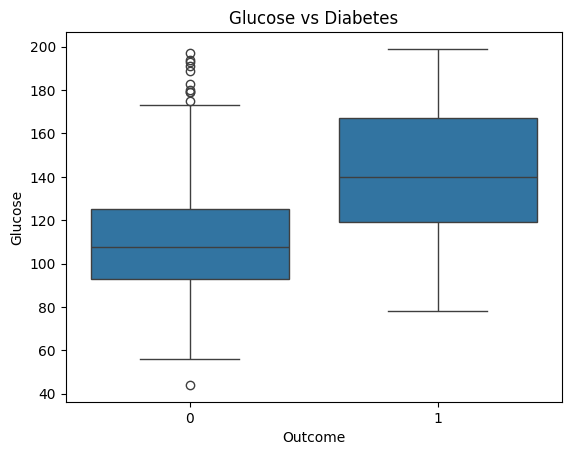

In [20]:
#Glucose and Diabetes
sns.boxplot(x='Outcome', y='Glucose', data=df).set_title('Glucose vs Diabetes')

Glucose level plays a significant role in determining whether the patient has diabetes. Patients with a median glucose level of less than 120 are more likely to be nondiabetic. Patients with a median glucose level greater than 140 are more likely to be diabetic. Therefore, high glucose levels are a good indicator of diabetes.

Text(0.5, 1.0, 'BloodPressure vs Diabetes')

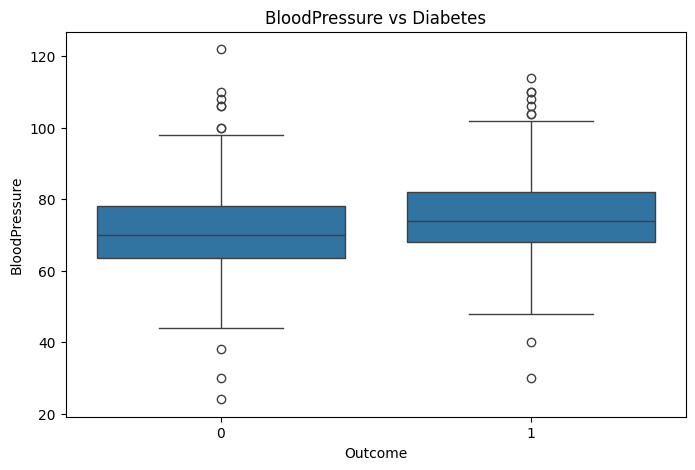

In [23]:
#Blood Pressure and Diabetes
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df).set_title('BloodPressure vs Diabetes')


The boxplot shows that the median blood pressure for diabetic patients is slightly higher than nondiabetic patients. There has not been enough evidence to conclude that blood pressure is a good predictor of diabetes.

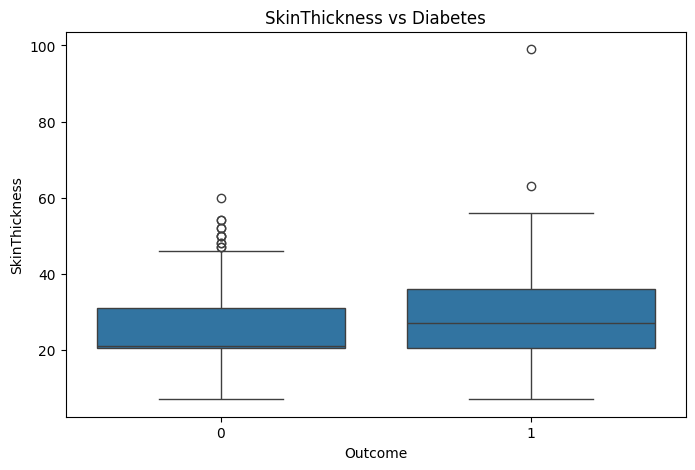

In [24]:
#Skin Thickness and Diabetes
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='SkinThickness', data=df).set_title('SkinThickness vs Diabetes')
plt.show()


As observed in the boxplot, the median skin thickness is higher for diabetic patients than nondiabetic patients. Nondiabetic patients have a median skin thickness of nearly 20, compared to almost 30 in diabetic patients.Therefore, skin thickness can be an indicator of diabetes.

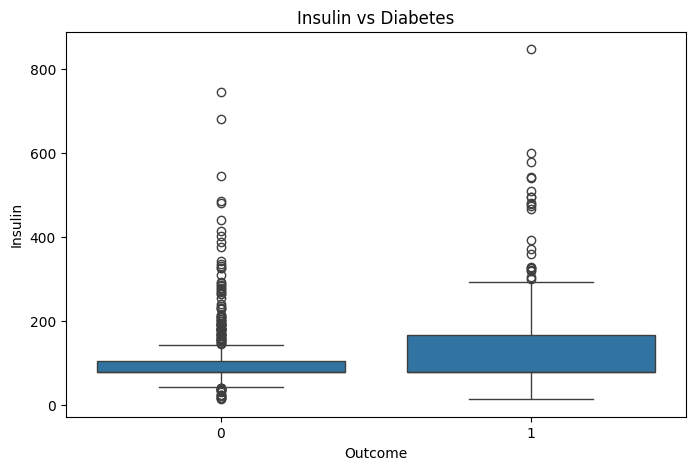

In [26]:
#Insulin and Diabetes
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Insulin', data=df).set_title('Insulin vs Diabetes')
plt.show()



Insulin is a major body hormone that regulates glucose metabolism. It’s required for the body to use sugars, fats, and proteins efficiently. Any change in insulin amount in the body would also result in a change in glucose levels. In nondiabetic patients, the insulin level is near 100, whereas in diabetic patients, the insulin level is near 200. This indicates that the insulin level is a good indicator of diabetes.

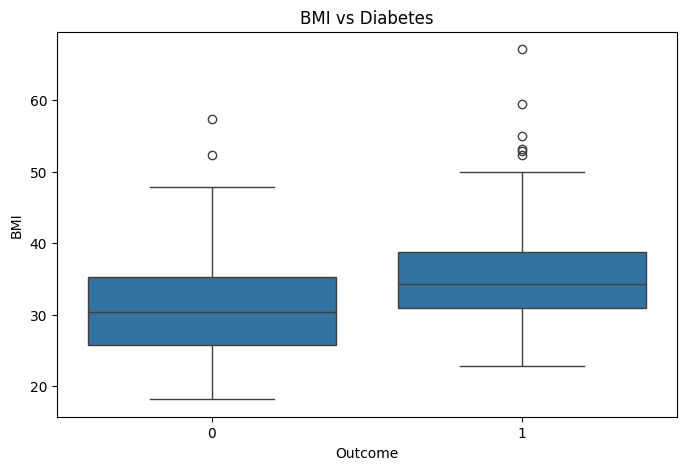

In [27]:
#BMI and Diabetes
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='BMI', data=df).set_title('BMI vs Diabetes')
plt.show()


Nondiabetic patients have a normal BMI within the range of 25–35, whereas diabetic patients have a BMI greater than 35.However, in diabetic patients, there is an increased spread at 35 and an increased spread at 45–50 compared to nondiabetic patients. Therefore, BMI is a good predictor of diabetes, and obese people are more likely to be diabetic.

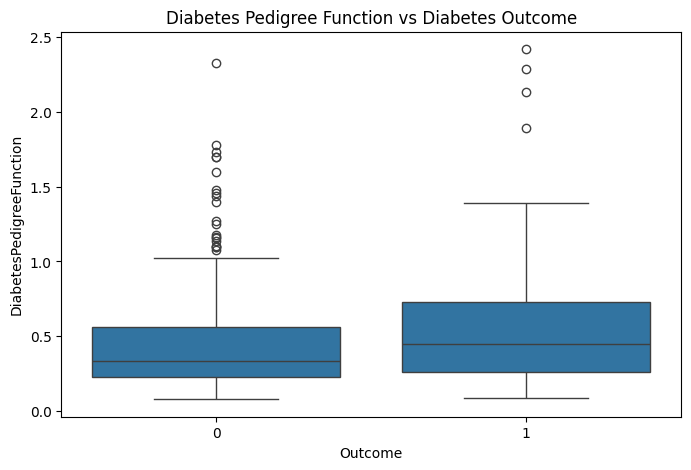

In [28]:
#Diabetes Pedigree Function and Diabetes Outcome
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df).set_title('Diabetes Pedigree Function vs Diabetes Outcome')
plt.show()


The Diabetes Pedigree Function (DPF) calculates diabetes likelihood depending on the subject’s age and diabetic family history. The boxplot shows that patients with lower DPF are much less likely to have diabetes. The patients with higher DPF are much more likely to have diabetes. Therefore, the DPF is a good indicator of diabetes.

Text(0.5, 1.0, 'Correlation Heatmap')

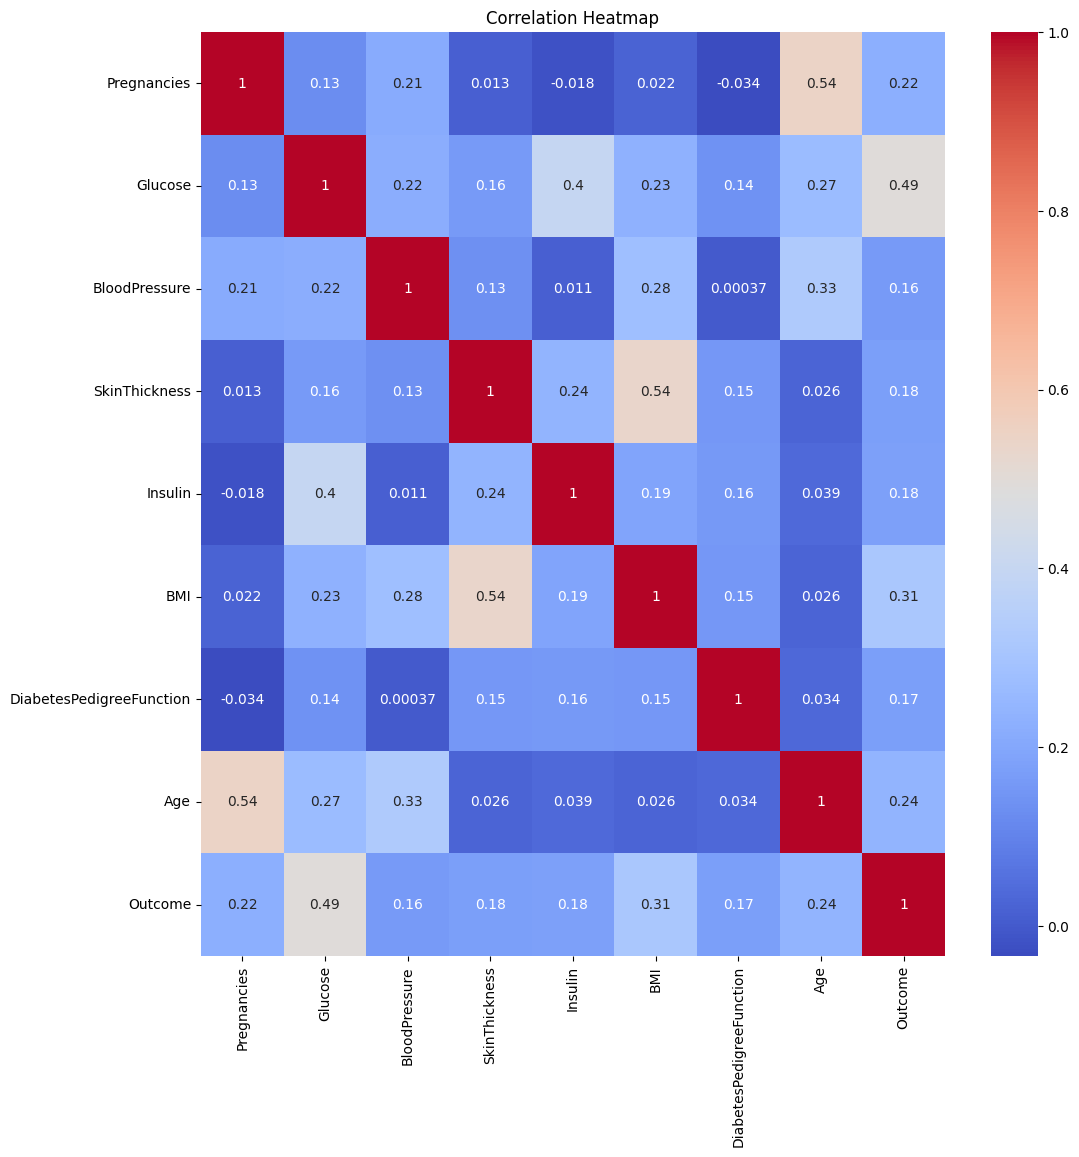

In [29]:
#Correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm').set_title('Correlation Heatmap')